## 1) Google play store data analysis :

     In this notebook I will analyze and compare different apps on android google play store 
     I will also make some useful visualizations to make it easy for anyone to see the insights from the data
     
     
     

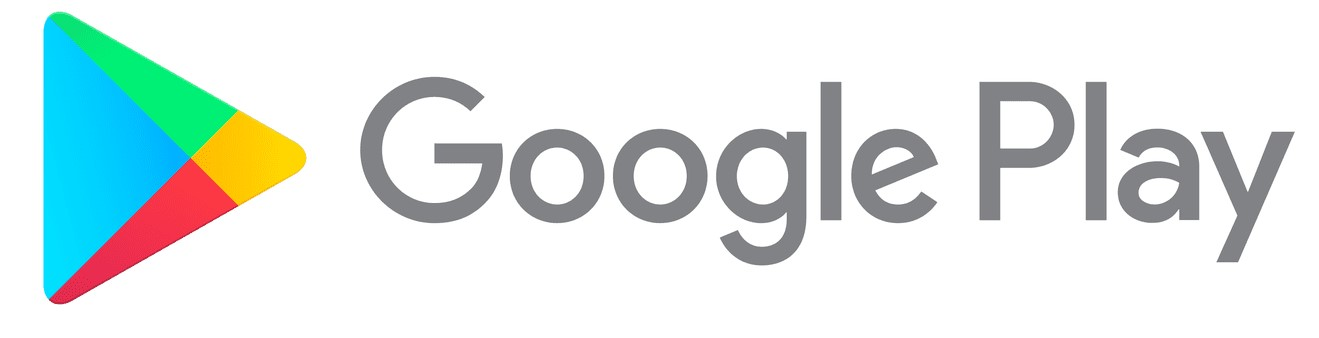

##  2) We have 2 datasets :
  **1. apps.csv** : it contains information about every app like ( catogery , rating , price , etc..)   
  **2. user_reviews.csv** : contains many user reviews and sentiments about each app

## 3) importing libararies and reading the data :

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

apps = pd.read_csv("../input/processed-android/apps.csv",index_col = 0)
reviews = pd.read_csv("../input/processed-android/user_reviews.csv",usecols = ['App','Sentiment','Sentiment_Polarity'])

In [14]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
apps.shape

(9659, 13)

In [16]:
reviews.head()

,App,Sentiment,Sentiment_Polarity
0,10 Best Foods for You,Positive,1.00
1,10 Best Foods for You,Positive,0.25
2,10 Best Foods for You,NaN,NaN
3,10 Best Foods for You,Positive,0.40
4,10 Best Foods for You,Positive,1.00


In [17]:
reviews.shape

(64295, 3)

## 4) Data cleaning :

###  &nbsp; &nbsp; 4.1) removing duplicates :

In [18]:
apps.drop_duplicates(subset = ['App'],inplace = True)
apps.shape

(9659, 13)

###  &nbsp; &nbsp; 4.2) working with data types:

In [19]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Installs column and price should be numeric not object data type

In [20]:
apps['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [21]:
apps['Price'].value_counts()

0          8903
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

both columns has non-numeric characters that should be removed 

In [22]:
not_numeric = ['$',',','+']
def edit_string(s) :
    for c in not_numeric :
        s = s.replace(c,'')
    return s

apps['Installs'] = apps['Installs'].apply(edit_string)
apps['Price'] = apps['Price'].apply(edit_string)


In [23]:
apps['Installs'] = apps['Installs'].astype(int)
apps['Price'] = apps['Price'].astype(float)
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [24]:
reviews.dtypes

App                    object
Sentiment              object
Sentiment_Polarity    float64
dtype: object

No problem in reviews data types

###  &nbsp; &nbsp; 4.3) checking mixed data types :

In [25]:
for col in apps.columns.tolist(): 
    weird = (apps[[col]].applymap(type) != apps[[col]].iloc[0].apply(type)).any(axis = 1) 
    if len (apps[weird]) > 0: 
        print (col)

Current Ver
Android Ver


In [26]:
apps['Current Ver'] = apps['Current Ver'].astype(str)
apps['Android Ver'] = apps['Android Ver'].astype(str)

In [27]:
for col in reviews.columns.tolist(): 
    weird = (reviews[[col]].applymap(type) != reviews[[col]].iloc[0].apply(type)).any(axis = 1) 
    if len (reviews[weird]) > 0: 
        print (col)

Sentiment


In [28]:
reviews['Sentiment'] = reviews['Sentiment'].astype(str)

## 5) Distribution of app rating and salas analysis:

###  &nbsp; &nbsp; 5.1) Distribution of rating for apps :

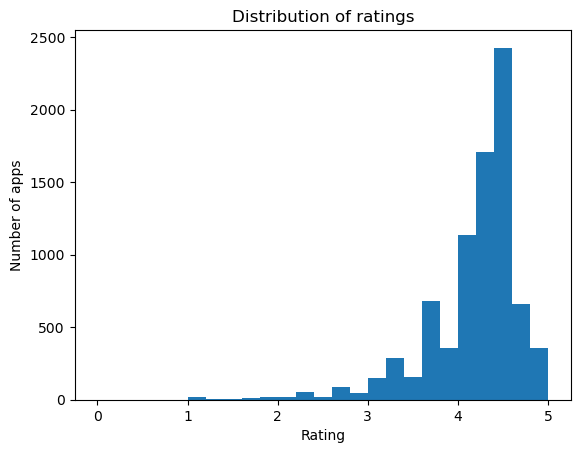

In [29]:
plt.xlabel('Rating')
plt.ylabel('Number of apps')
plt.title('Distribution of ratings')
plt.hist(apps['Rating'],bins = np.arange(0,5.2,0.2))
plt.show()

###  &nbsp; &nbsp; 5.2) relation between price and rating :

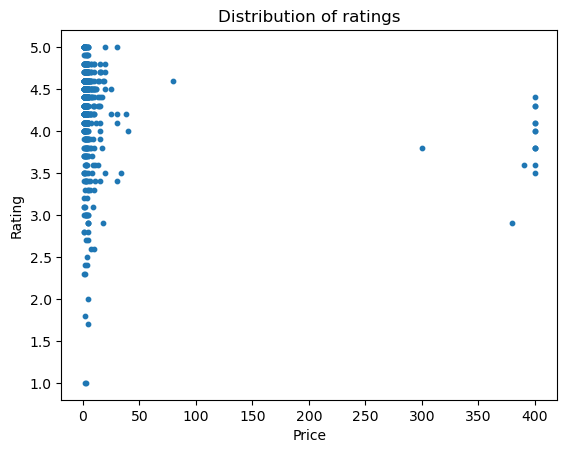

In [30]:
edited_apps1 = apps.dropna(subset = ['Rating','Price','Reviews'],how = 'any')
paid_apps1 = edited_apps1.loc[edited_apps1['Type']=='Paid']
x = paid_apps1['Price']
y = paid_apps1['Rating']
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Distribution of ratings')
plt.scatter(x,y,s = 10)
plt.show()

We can see that there is so outliers which has really high price
this can be junk apps let's see the highest prices apps aand filter it

In [31]:
paid_apps1.sort_values('Price',ascending = False).head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5369,I am Rich,FINANCE,4.3,180,3.8,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1,4.2 and up
5359,I am rich(premium),FINANCE,3.5,472,1.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93,22.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up


We can see that most of the very expensive apps are junk apps ( it has little reviews and relatively low rating so it maybe just made for joke or on purpose to make rich people buy them , thing like ( I'm rich , I'm extremely rich )
so we can filter out the apps taht are higher than $100 and plot again after filtering

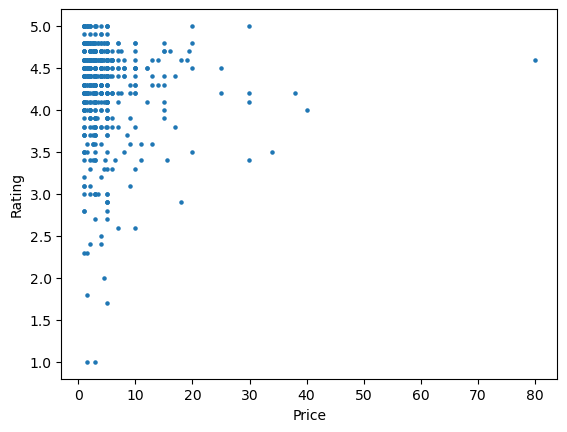

In [32]:
apps = apps.loc[apps['Price']<=100]
edited_apps1 = apps.dropna(subset = ['Rating','Price','Reviews'],how = 'any')
paid_apps1 = edited_apps1.loc[edited_apps1['Type']=='Paid']
x = paid_apps1['Price']
y = paid_apps1['Rating']
plt.xlabel('Price')
plt.ylabel('Rating')
plt.scatter(x,y,s = 5)
plt.show()

we can see that there is no really high correlation between price and rating , so when the price of the app is high it doesn't always mean it's the best

###  &nbsp; &nbsp; 5.3) best 10 apps by sales :

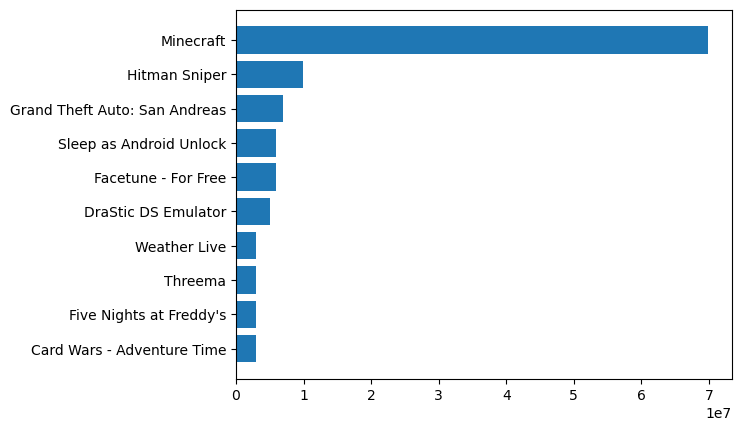

In [33]:
apps['Sales'] = apps['Installs'] * apps['Price']
heighst = apps.nlargest(10,'Sales')[['App','Sales']].sort_values('Sales')
plt.barh(heighst['App'],heighst['Sales'])
plt.show()

###  &nbsp; &nbsp; 5.4) does size affect rating,price and number of installs?


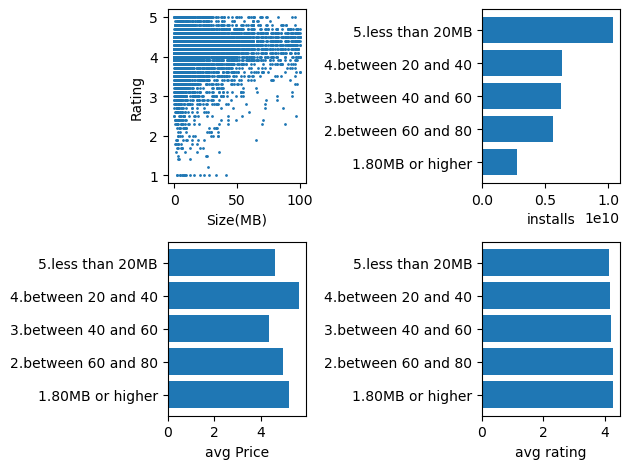

In [34]:
apps.loc[apps['Size']>=80,'Size_cat'] = '1.80MB or higher'
apps.loc[(apps['Size']>=60) & (apps['Size'] <80),'Size_cat'] = '2.between 60 and 80'
apps.loc[(apps['Size']>=40) & (apps['Size'] <60),'Size_cat'] = '3.between 40 and 60'
apps.loc[(apps['Size']>=20) & (apps['Size'] <40),'Size_cat'] = '4.between 20 and 40'
apps.loc[apps['Size']<20,'Size_cat'] = '5.less than 20MB'

edited_apps = apps.dropna(subset = ['Rating','Size','Installs'],how = 'any')
gg = edited_apps.groupby('Size_cat').agg({'Rating':['mean'],'Installs':['sum']})

paid_apps2 = apps.loc[apps['Type']=='Paid']
edited_apps2 = paid_apps2.dropna(subset = ['Size','Price'],how = 'any')
ggg = edited_apps2.groupby('Size_cat')['Price'].mean()

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols = 2)
ax1.scatter(edited_apps['Size'],edited_apps['Rating'],s = 1)
ax1.set_xlabel('Size(MB)')
ax1.set_ylabel('Rating')

ax2.barh(gg.index,gg[('Installs','sum')])
ax2.set_xlabel('installs')

ax3.barh(ggg.index,ggg.values)
ax3.set_xlabel('avg Price')

ax4.barh(gg.index,gg[('Rating','mean')])
ax4.set_xlabel('avg rating')

plt.tight_layout()
plt.show()

from the above visualizations we can conclude that : 
1. there is not really a strong correlation between rating and size which means we can't say that a bigger app size will get higher    rating
2. most of the installs happen for small-sized apps which means users care about the memory
3. the price doesn't really depend on the app size (it varies)
4. the rating also doesn't depend on the size ( we can see that the avg rating are almost the same for all size categories)

## 6) what app categories has the highest rating, number of installs and sales?

In [35]:
edited_apps = apps.dropna(subset = ['Rating','Installs'],how = 'any')
g = edited_apps.groupby('Category').agg({'Rating':['mean','min','max'],'Installs':['sum'],'Sales':['sum']})
g['Rating']['mean'].nlargest(5)

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
Name: mean, dtype: float64

In [36]:
g['Rating']['mean'].std()

0.10681052003928329

Here we can see the 5 categories which has the highest rating
although from the standard deviation we can see that there is no big difference in the apps rating

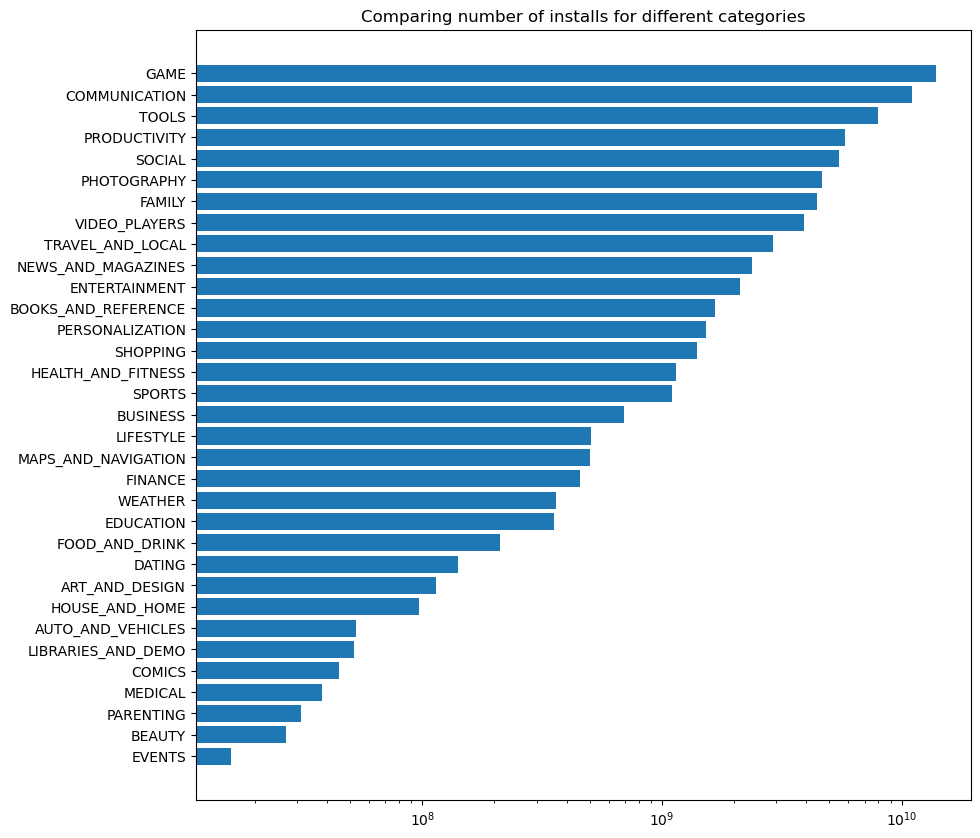

In [37]:
g.sort_values(by = ('Installs','sum'),inplace = True)
plt.style.use('default')
plt.figure(figsize = (10,10))
plt.title('Comparing number of installs for different categories')
plt.xscale('log')
plt.barh(g.index,g['Installs']['sum'])
plt.show()

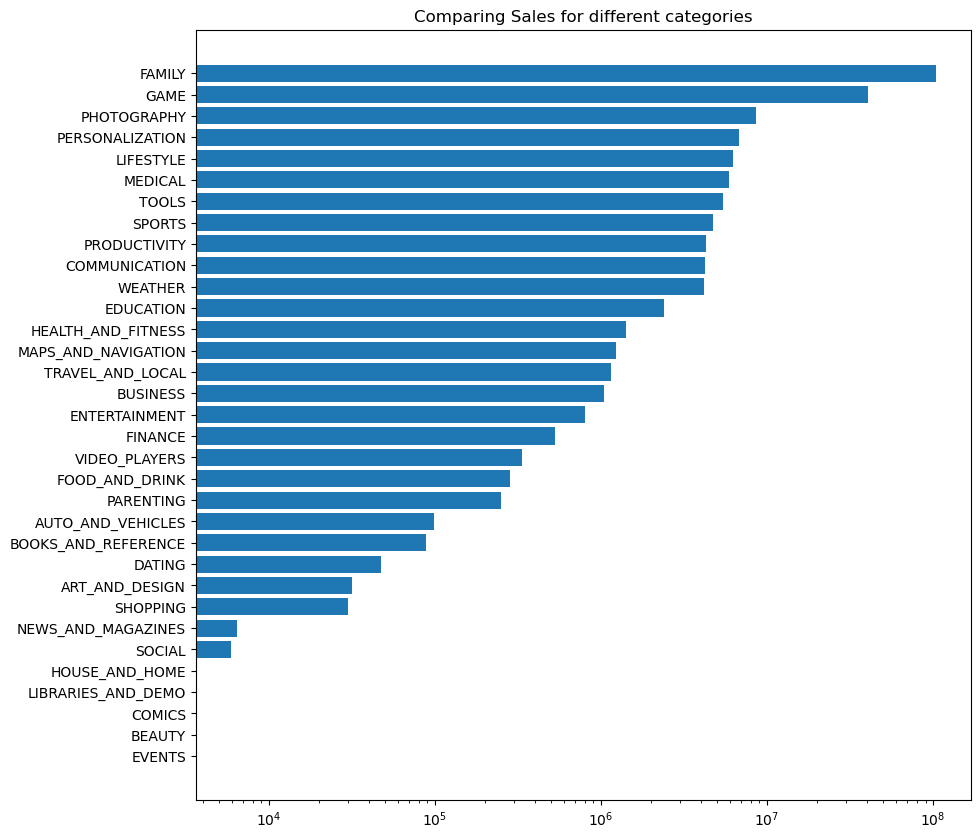

In [38]:
g.sort_values(by = ('Sales','sum'),inplace = True)
plt.style.use('default')
plt.figure(figsize = (10,10))
plt.title('Comparing Sales for different categories')
plt.xscale('log')
plt.barh(g.index,g['Sales']['sum'])
plt.show()

## 7) Comparison between free apps and paid apps in terms of (rating,installs,sentiment)

###  &nbsp; &nbsp; 7.1) Rating and Number of installs :


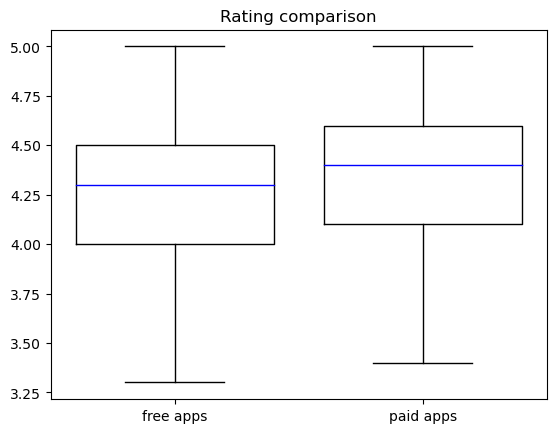

In [39]:
free_apps = apps.loc[apps['Type']=='Free']
free_apps = free_apps.dropna(subset = ['Rating'])

paid_apps = apps.loc[apps['Type']=='Paid']
paid_apps = paid_apps.dropna(subset = ['Rating'])


plt.boxplot([free_apps['Rating'],paid_apps['Rating']],labels = ['free apps','paid apps'],showfliers=False,medianprops = {'color':'blue'},widths = [0.8,0.8])
plt.title('Rating comparison')


plt.show()

In [40]:
[free_apps['Installs'].sum(),paid_apps['Installs'].sum()]

[75059723856, 57132382]

###  &nbsp; &nbsp; 7.2) Comparison of sentiment :


In [41]:
reviews.dropna(how = 'any',inplace = True)
apps_merged = apps.merge(reviews,on = 'App')
apps_merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sales,Size_cat,Sentiment,Sentiment_Polarity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,5.less than 20MB,Negative,-0.250
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,5.less than 20MB,Negative,-0.725
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,5.less than 20MB,Neutral,0.000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,5.less than 20MB,Positive,0.500
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,5.less than 20MB,Negative,-0.800


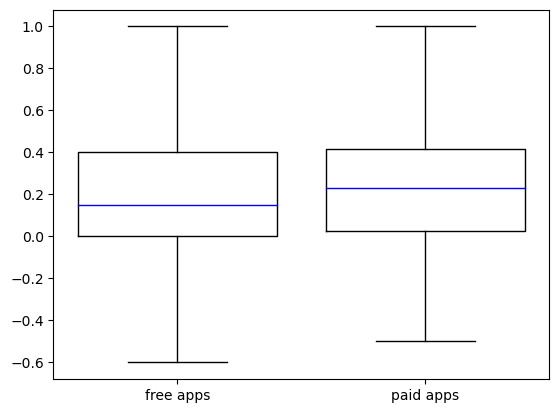

In [42]:
free_apps = apps_merged.loc[apps_merged['Type']=='Free']
paid_apps = apps_merged.loc[apps_merged['Type']=='Paid']

plt.boxplot([free_apps['Sentiment_Polarity'],paid_apps['Sentiment_Polarity']],labels = ['free apps','paid apps'],showfliers=False,medianprops = {'color':'blue'},widths = [0.8,0.8])
plt.show()

So we can see that in terms of both rating and sentiment paid apps is better than free apps
and free apps is more frequently installed that paid apps